In [1]:
import sys
from pathlib import Path
from itertools import cycle

import tensorflow as tf
from tensorflow.keras.losses import mae, mse, huber
import numpy as np
import matplotlib.pyplot as plt

In [6]:
SAVEFIGS: bool = False

In [2]:
print(f"Python version: {sys.version}")
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU: {tf.config.list_physical_devices('GPU')}")

Python version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.3.1
GPU: []


In [3]:
out = Path('./out/plots/loss').resolve()

In [4]:
dir(tf.keras.losses)

['BinaryCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'Reduction',
 'SparseCategoricalCrossentropy',
 'SquaredHinge',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'binary_crossentropy',
 'categorical_crossentropy',
 'categorical_hinge',
 'cosine_similarity',
 'deserialize',
 'get',
 'hinge',
 'huber',
 'kl_divergence',
 'kld',
 'kullback_leibler_divergence',
 'log_cosh',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'msle',
 'poisson',
 'serialize',
 'sparse_categorical_crossentropy',
 'squared_hinge']

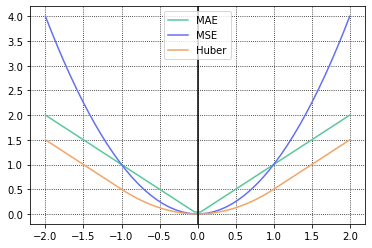

In [5]:
xs_: np.ndarray = np.linspace(-2, 2)
loss_fns: tuple = ('MAE', 'MSE', 'Huber')
colors = {'green': '#59C899', 'blue': '#6370F1', 'orange': '#F3A467', 'purple': '#A16AF2', 'light_blue': '#5BCCC7', 'red': '#DF6046'}
cmap = cycle(colors.values())


def compute_ys(xs: np.ndarray, fn: str) -> list:
    loss_functions: dict = dict(MAE=mae,
                                MSE=mse,
                                Huber=huber)
    ys: list = []
    for x in xs:
        res = loss_functions[fn](np.zeros(5), np.repeat(x, 5))
        ys.append(res.numpy())
    
    return ys


ys_: dict = {loss: compute_ys(xs_, loss) for loss in loss_fns}

for i, loss in enumerate(loss_fns):
    plt.plot(xs_, ys_[loss], label=loss, c=next(cmap))
plt.axvline(0, color='k')
plt.legend()
plt.grid(c='k', ls=':')
if SAVEFIGS:
    plt.savefig(out / 'loss_mae_mse.pdf', dpi=600, transparent=True)
plt.show()